In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init(numNodes:int):
    x = np.ones((numNodes))/numNodes
    return x

In [10]:
def bruteForce(x: np.array, P: np.array, threshold: float, damp=False, alpha=0.1):
    num_pages = x.shape[0] 
    rank = []
    min_iter = 0

    if damp:
        P = (1-alpha)*(P.T) + (alpha/num_pages)*np.ones((num_pages,num_pages))
        P = P.T
        print(P)

    for i in range(num_pages):
        rank.append([x[i]])

    for i in range(200):
        x_new = np.matmul(P, x)
        for j in range(num_pages):
            rank[j].append(x[j])
        if np.linalg.norm(x_new - x) <= threshold and min_iter == 0:
            min_iter = i 
            # break
        x = x_new


    return x, min_iter, rank

In [4]:
def eigenSolver(P:np.array)->np.array:
    eigenvalue, eigenvector = np.linalg.eig(P.T)
    dominant_value = np.argmax(eigenvalue.real)
    dominant_vector = (eigenvector[:,dominant_value]).real
    dominant_vector = dominant_vector/np.sum(dominant_vector)

    return dominant_vector


In [5]:
def plot(rank:np.array, numNodes:int, min_iter:int):
    numIteration = len(rank[0])
    for i in range(numNodes):
        plt.plot(range(numIteration), rank[i], label = f"Page {i+1}")
    plt.axvline(x=min_iter, linestyle='--', label='Minimum Iteration')
    plt.legend()
    plt.xlabel("Number of Iterations")
    plt.ylabel("")
    plt.show()

In [15]:
x = init(4)
# P = np.array(((0, 0.5, 0, 0, 0), (1, 0, 0.5, 0.5, 0), (0, 0, 0, 0, 1), (0, 0, 0.5, 0, 0),
#               (0, 0.5, 0, 0.5, 0)))
P = np.array(((0.0, 1.0, 0.0, 0.0), (1.0 , 0.0, 0.0, 0.0), (0.0, 0.5, 0.0, 0.5), (0.5, 0, 0.5, 0)))
print(f"x = {x}")
# print(f"P = \n{P}")
x, min_iter, rank = bruteForce(x, P.T, 0.001, damp=True, alpha=0.15)
print(f"x = {x}")
# print(len(iteration))
# temp = np.linalg.eig(P.T)
# print(temp[0].real)
# print(min_iter)
# print(len(rank[0]))
# v = eigenSolver(P)
# print(f"v = {v}")

x = [0.25 0.25 0.25 0.25]
[[0.0375 0.8875 0.0375 0.4625]
 [0.8875 0.0375 0.4625 0.0375]
 [0.0375 0.0375 0.0375 0.4625]
 [0.0375 0.0375 0.4625 0.0375]]
x = [0.43478261 0.43478261 0.06521739 0.06521739]


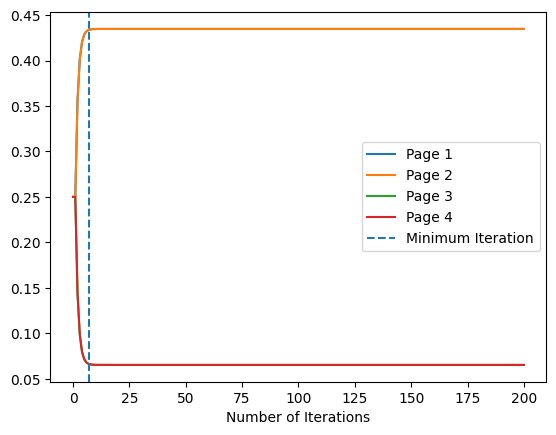

In [16]:
plot(rank, 4, min_iter=min_iter)